<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB
Shape of X_train: (3415, 11)
Shape of X_test: (854, 11)
Shape of y_train: (3415,)
Shape of y_test: (854,)
Accu

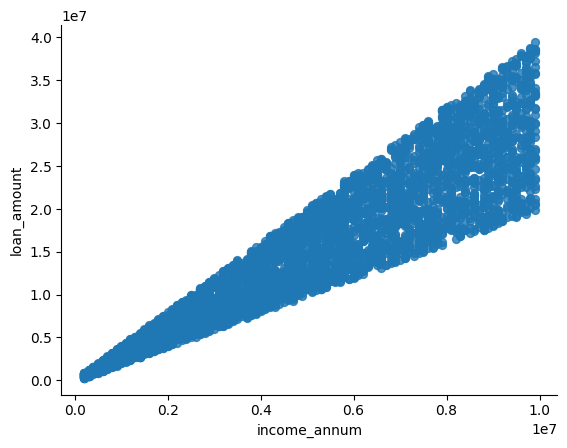

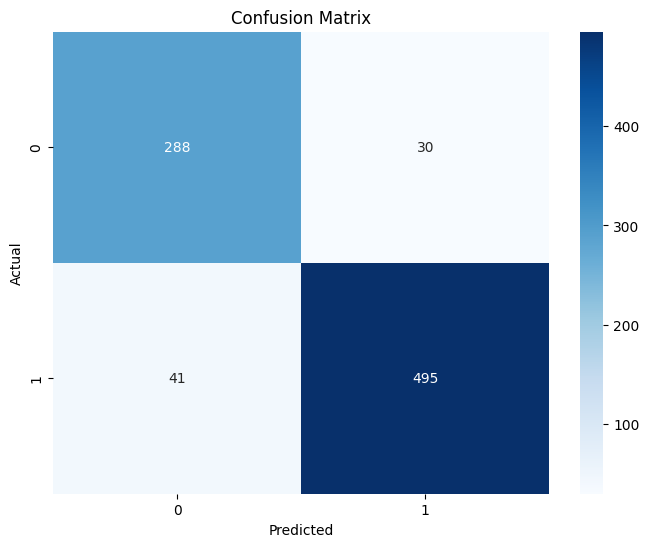

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       318
           1       0.94      0.92      0.93       536

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy on test set: 0.9391100702576113
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'C': 293.21000471832986, 'gamma': 0.02734702913886812, 'kernel': 'rbf'}
Accuracy on test set: 0.9449648711943794


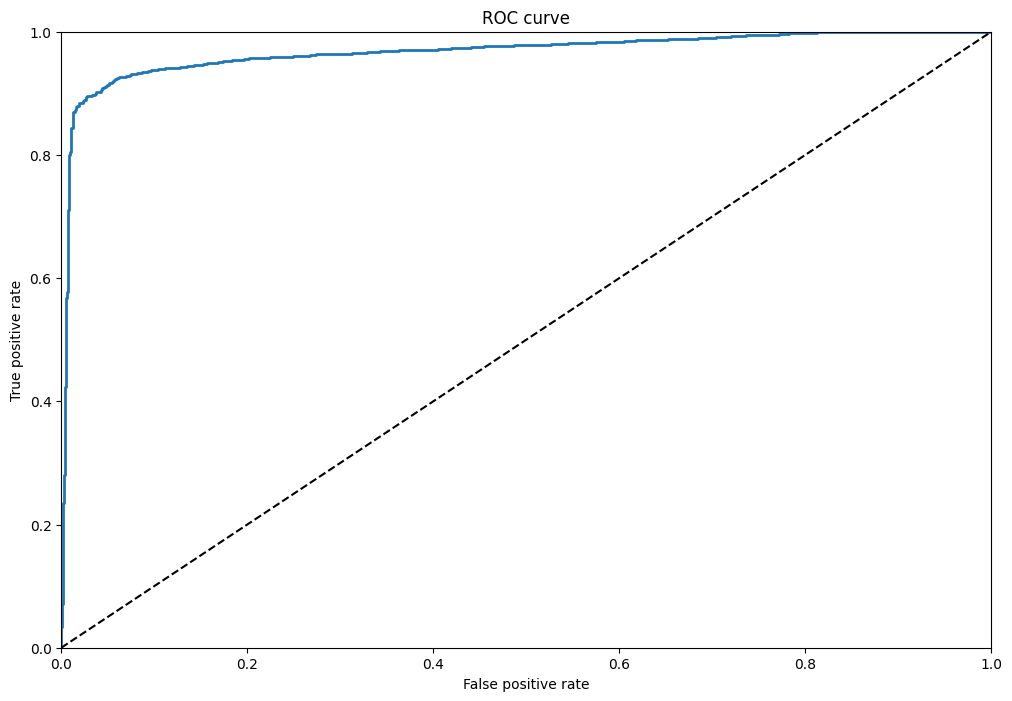

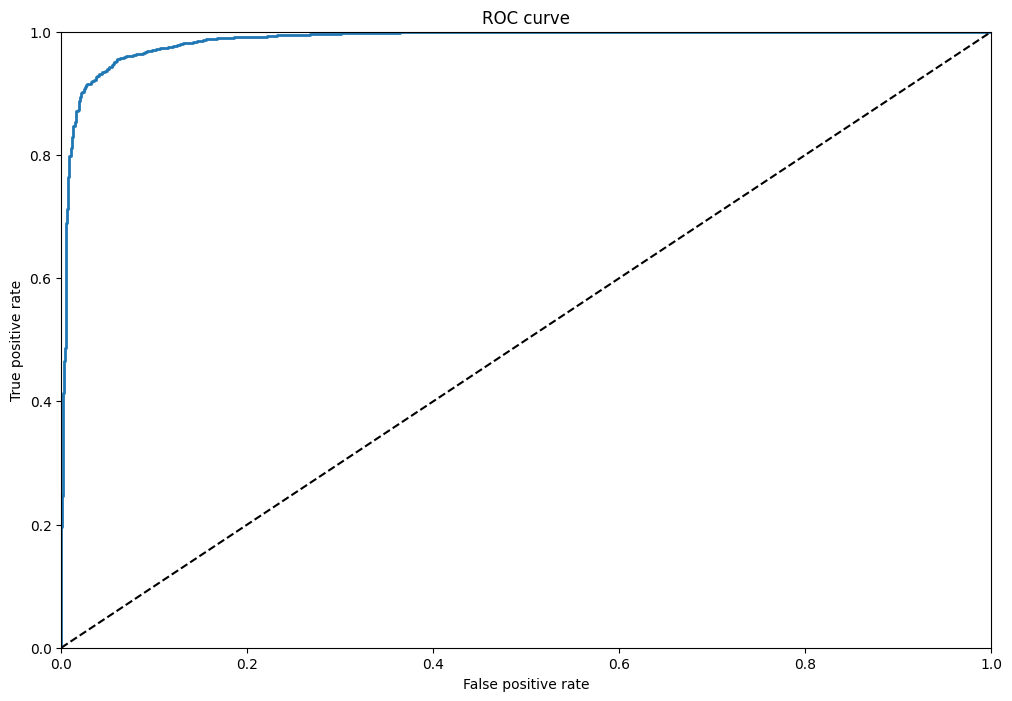

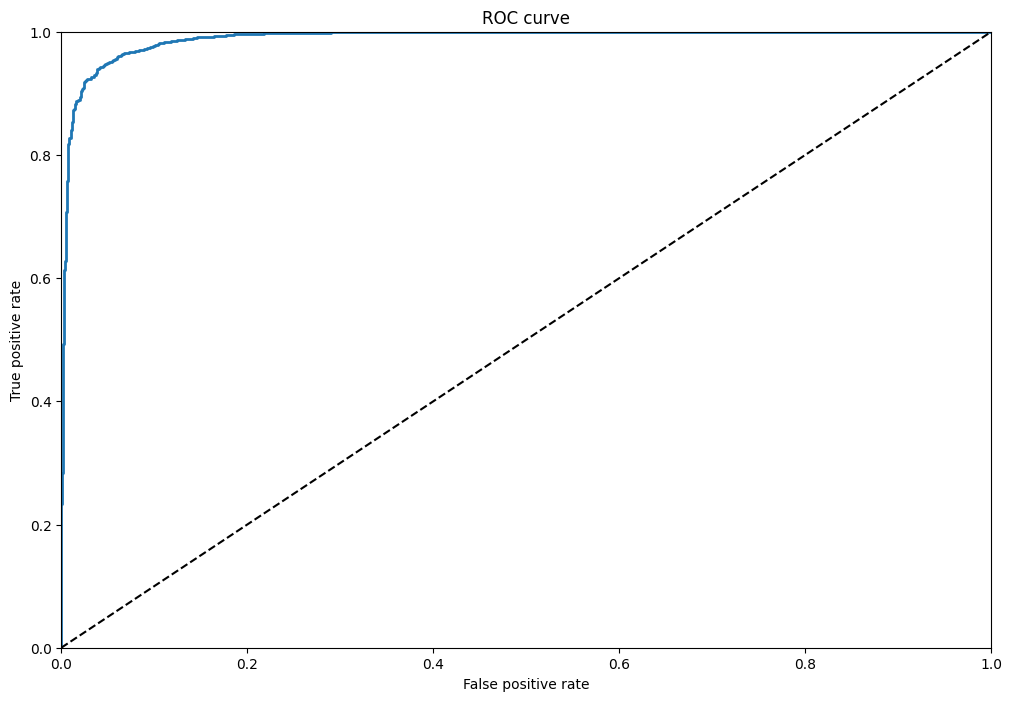

Accuracy: 0.977751756440281


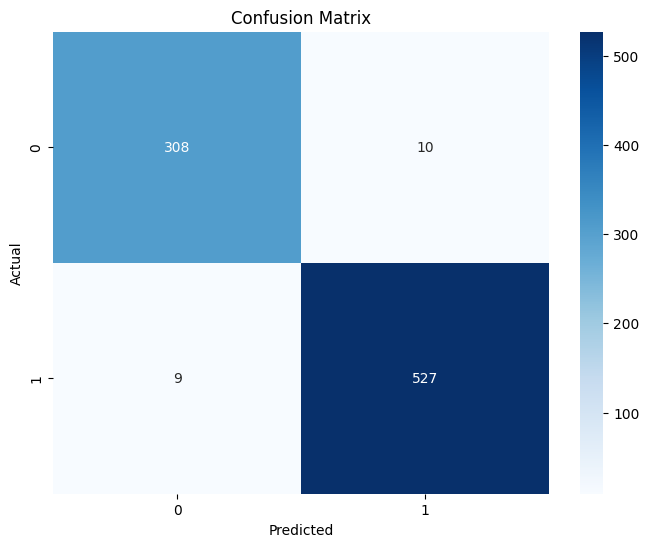

Decision Tree Classifier Metrics:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



InvocationException: GraphViz's executables not found

In [2]:
# -*- coding: utf-8 -*-
"""Copy of LOAN.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1SmFe57yab6ssAnDeL5Z5bS9ndmBvHLH4
"""

import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
from sklearn.tree import export_graphviz
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error

from io import StringIO
from IPython.display import Image, display
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeRegressor, DecisionTreeClassifier


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/PC/OneDrive/Desktop/AML/DT and SVM/loan_approval_dataset.csv")
df

df.isnull().sum()

df.duplicated().sum()

df.drop('loan_id',axis=1 ,inplace=True)

df.dtypes

# Removing whitespaces from column names
df.columns = df.columns.str.strip()

# Removing white spaces from values in the dataframe
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df.self_employed.value_counts()

df.education.value_counts()

df.loan_status.value_counts()

# to convert object to int
df["self_employed"] = df["self_employed"].apply(lambda x: 1 if x == "Yes" else 0)
df["education"] = df["education"].apply(lambda x: 1 if x == "Graduate" else 0)
df["loan_status"] = df["loan_status"].apply(lambda x: 1 if x == "Approved" else 0)

df["loan_status"].unique()

df.head()

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='income_annum', y='loan_amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.info()

df

x=df.drop(['loan_status'], axis=1)
y=df['loan_status']

np.unique(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

svc = SVC(kernel="linear")

svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

#Finding the best parameters for Supported Vector classifiar model using grid_search
param_grid = {
    'C': [1, 10, 100],  # Penalty parameter C
    'gamma': [1, 0.1, 0.01],  # Kernel coefficient for 'rbf'
    'kernel': ['rbf','linear' ,'sigmoid']  # Kernel type
}

# Grid Search Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params_grid = grid_search.best_params_
print("Best hyperparameters:", best_params_grid)

# Train SVM model with best hyperparameters
best_svm_grid = SVC(**best_params_grid)
best_svm_grid.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = best_svm_grid.score(X_test_scaled, y_test)
print("Accuracy on test set:", accuracy)

# Define the distribution of hyperparameters for Randomized Search
param_distributions = {
    'C': loguniform(1e-4, 1e4),  # Penalty parameter C (log scale)
    'gamma': loguniform(1e-4, 1e4),  # Kernel coefficient for 'rbf' (log scale)
    'kernel': ['rbf','sigmoid']  # Kernel type
}

# Randomized Search Cross Validation to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, n_iter=100,
                                   cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params_rdm = random_search.best_params_
print("Best hyperparameters:", best_params_rdm)

# Train SVC model with best hyperparameters
best_svc_rdm = SVC(**best_params_rdm)
best_svc_rdm.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = best_svc_rdm.score(X_test_scaled, y_test)
print("Accuracy on test set:", accuracy)

y_scores = cross_val_predict(svc, X_train_scaled, y_train, cv=5,method='decision_function')
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()

y_scores = cross_val_predict(best_svm_grid, X_train_scaled, y_train, cv=5,method='decision_function')
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()

y_scores = cross_val_predict(best_svc_rdm, X_train_scaled, y_train, cv=5,method='decision_function')
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()

#we need to make a function that finds out the score of our training and testing
def M_S(y_real, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_real, y_pred),
                      'precision': precision_score(y_real, y_pred,),
                      'recall': recall_score(y_real, y_pred,),
                      'f1': f1_score(y_real, y_pred,)},
                      name=label)

#we need to know The error on the training and test data sets
y_train_pred = svc.predict(X_train_scaled)
y_test_pred = svc.predict(X_test_scaled)

train_test_full_error = pd.concat([M_S(y_train, y_train_pred, 'train'),M_S(y_test, y_test_pred, 'test')],axis=1)
train_test_full_error

#we need to know The error on the training and test data sets
y_train_pred = best_svm_grid.predict(X_train_scaled)
y_test_pred = best_svm_grid.predict(X_test_scaled)

train_test_full_error = pd.concat([M_S(y_train, y_train_pred, 'train'),M_S(y_test, y_test_pred, 'test')],axis=1)
train_test_full_error

y_train_pred = best_svc_rdm.predict(X_train_scaled)
y_test_pred = best_svc_rdm.predict(X_test_scaled)

train_test_full_error = pd.concat([M_S(y_train, y_train_pred, 'train'),M_S(y_test, y_test_pred, 'test')],axis=1)
train_test_full_error

from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test_scaled)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix

print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print(classification_report(y_test, y_pred))

y_train_pred = decision_tree.predict(X_train_scaled)
y_test_pred = decision_tree.predict(X_test_scaled)

train_test_full_error = pd.concat([M_S(y_train, y_train_pred, 'train'),M_S(y_test, y_test_pred, 'test')],axis=1)
train_test_full_error

# Create an output destination for the file
dot_data = StringIO()

export_graphviz(decision_tree, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the decision tree image
filename = 'C:/Users/PC/OneDrive/Desktop/AML/loan_tree.png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)

y_scores = cross_val_predict(decision_tree, X_train_scaled, y_train, cv=5,method='predict_proba')
# Get decision scores for the positive class (class 1)
y_scores = y_scores[:, 1]
fpr, tpr, thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()

'Selling_Price(EGP)', 'Present_Price(EGP)', 'Kms_Driven', 'Past_Owners',
'Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
'Transmission_Manual'

def predict_selling_price(present_price, kms_driven, past_owners, age, fuel_type, seller_type, transmission):

    new_row = pd.DataFrame({
        'Present_Price(EGP)': [present_price],
        'Kms_Driven': [kms_driven],
        'Past_Owners': [past_owners],
        'Age': [age],
        'Fuel_Type_Diesel': [1 if fuel_type == 'Diesel' else 0],
        'Fuel_Type_Petrol': [1 if fuel_type == 'Petrol' else 0],
        'Seller_Type_Individual': [1 if seller_type == 'Individual' else 0],
        'Transmission_Manual': [1 if transmission == 'Manual' else 0]
    })

    ann_model = load_model('C:/Users/PC/OneDrive/Desktop/AML/Cars/Cars/ann_model.h5')

    predicted_price = ann_model.predict(new_row)

    return predicted_price[0][0]



